In [10]:
from matplotlib import pyplot as plt
from pylab import *
import numpy as np
import seaborn as sns
import scipy as sp
import pandas as pd

sys.path.insert(0, '/Users/haly/idefix/pytools')
from vtk_io import *
pi = 3.14






In [ ]:
omega = 1.
t = np.linspace(0,10*pi,2000)
z = 1.
kappa = omega + 0.01
rho_g = 1.
psi_mod=0.1
psi = -1j * psi_mod

def drift_vel_warp(f,st,ax,colour,style,label):
    ts = st / omega
    
    # evolution under 2 fluid equations

    H = 2j*omega*ts+1.+f
    R = ts**2*(kappa**2-omega**2)

    u_g_2f = (psi*omega*ts)*((1j*omega*ts*(R+H)+f*R)/(R*(R+H*(1+f))))*omega*z*exp(1j*omega*t)
    u_d_2f = (psi*omega*ts)*((1j*omega*ts*H-R)/(R*(R+H*(1+f))))*omega*z*exp(1j*omega*t)

    ax.plot(t/2./pi,(u_d_2f-u_g_2f)/10.,linewidth=2.0,linestyle=style,color=colour, label=label)

eta = 0.005

def drift_vel_si(f,st,ax,colour,style):
    A = (1+f)**2+st**2
    u_g = 2.*eta*f*st/A
    u_d = -2.*eta*st/A
    print(u_d-u_g)
    
    ax.hlines(y=(u_d-u_g),xmin=0,xmax=np.max(t/2/pi),linewidth=2.0,linestyle=style,color=colour)


(0.0, 1.0)

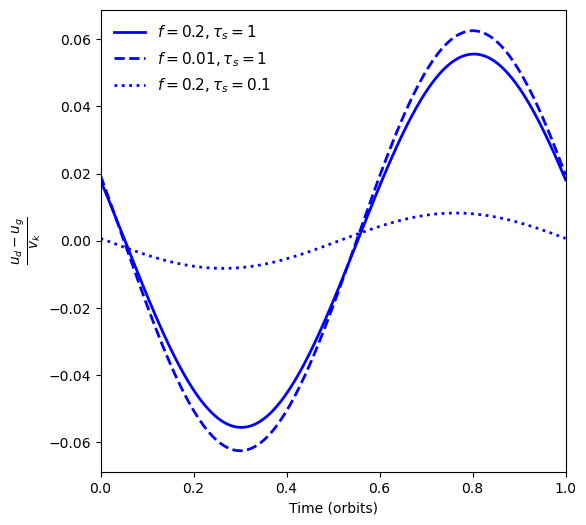

In [8]:
# drift velocities comparison between sloshing and SI

plt.rcParams["figure.figsize"] = (6,6)
fig,ax = plt.subplots(1,1)

drift_vel_warp(f=0.2,st=1,ax=ax,colour="blue",style="solid",label=r"$f=0.2,\tau_s=1$")
drift_vel_warp(f=0.01,st=1,ax=ax,colour="blue",style="dashed",label=r"$f=0.01,\tau_s=1$")
drift_vel_warp(f=0.2,st=0.1,ax=ax,colour="blue",style="dotted",label=r"$f=0.2,\tau_s=0.1$")



#drift_vel_si(f=0.2,st=1,ax=ax,colour="orange",style="solid")
#drift_vel_si(f=0.01,st=1,ax=ax,colour="orange",style="dashed")
#drift_vel_si(f=0.2,st=0.1,ax=ax,colour="orange",style="dotted")

ax.set_xlabel("Time (orbits)")
ax.set_ylabel(r'$\frac{u_d-u_g}{v_k}$', fontsize=14)
ax.legend( loc='best', frameon=False, ncols=1,fontsize=11)
#ax.set_ylim(-0.07,0.07)
ax.set_xlim(0,1)

Initial velocities for gas:
u_g =  4.14293833454248 v_g =  0.0025851848928175815
Initial velocities for dust:
u_d =  4.160930217834862 v_d =  -0.01292592446408808


/Users/haly/anaconda3/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


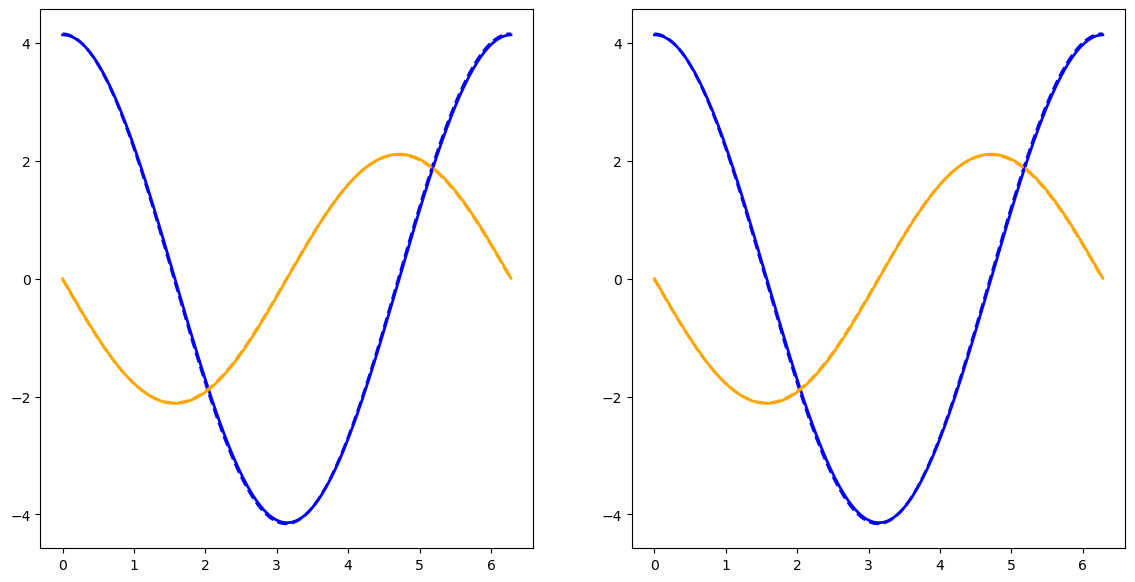

In [14]:
omega = 1.
t = np.linspace(0,2*pi,200)
z = 1.
kappa = omega + 0.01
rho_g = 1.
f = 0.2
psi_mod = 0.1
psi = -1j * psi_mod
st = 1.0
ts = st / omega




# evolution under terminal velocity approximation

sigma_damp = (1.+f)/ts
rho_d = rho_g * f
rho = rho_g + rho_d

U = 1j* psi*omega**2/(1.+f)/(kappa**2-omega**2)*omega*z*exp(1j*omega*t)
V = -kappa**2/2/omega**2*psi*omega**2/(1.+f)/(kappa**2-omega**2)*omega*z*exp(1j*omega*t)

U_h = omega*z*(2.*omega*psi*np.sin(kappa*t)/kappa/(1.+f))
V_h = omega*z*(psi*np.cos(kappa*t)/2./(1.+f))

U = U+U_h
V = V+V_h

Delta_U = (1j+sigma_damp/omega)*(-psi*omega**2/(kappa**2-omega**2+2j*omega*sigma_damp+sigma_damp**2))*omega*z*exp(1j*omega*t)
Delta_V = (-kappa**2/2./omega**2)*(-psi*omega**2/(kappa**2-omega**2+2j*omega*sigma_damp+sigma_damp**2))*omega*z*exp(1j*omega*t)

Delta_U_h = omega*z*(exp((1j*kappa-sigma_damp)*t)*(-1j*psi*omega/2/kappa)+exp(-(1j*kappa+sigma_damp)*t)*(1j*psi*omega/2/kappa))
Delta_V_h = omega*z*((psi/4.)*exp((1j*kappa-sigma_damp)*t)+(psi/4.)*exp(-(1j*kappa+sigma_damp)*t))

Delta_U = Delta_U+Delta_U_h
Delta_V = Delta_V+Delta_V_h


u_g_ta = ((1.+f)*U-f*Delta_U)/(1.+f)
v_g_ta = ((1.+f)*V-f*Delta_V)/(1.+f)
u_d_ta = Delta_U+u_g_ta
v_d_ta = Delta_V+v_g_ta


plt.rcParams["figure.figsize"] = (14,7)
fig,ax = plt.subplots(1,2)
ax[0].plot(t,u_g_ta,linewidth=2.0,linestyle="solid",color="blue")
ax[0].plot(t,v_g_ta,linewidth=2.0,linestyle="solid",color="orange")
ax[0].plot(t,u_d_ta,linewidth=2.0,linestyle="--",color="blue")
ax[0].plot(t,v_d_ta,linewidth=2.0,linestyle="--",color="orange")


# evolution under 2 fluid equations

H = 2j*omega*ts+1.+f
R = ts**2*(kappa**2-omega**2)

u_g_2f = (psi*omega*ts)*((1j*omega*ts*(R+H)+f*R)/(R*(R+H*(1+f))))*omega*z*exp(1j*omega*t)
v_g_2f = (-psi*kappa**2*ts**2/2.)*((R+H)/(R*(R+H*(1+f))))*omega*z*exp(1j*omega*t)
u_d_2f = (psi*omega*ts)*((1j*omega*ts*H-R)/(R*(R+H*(1+f))))*omega*z*exp(1j*omega*t)
v_d_2f = (-psi*kappa**2*ts**2/2.)*(H/(R*(R+H*(1+f))))*omega*z*exp(1j*omega*t)

ax[1].plot(t,u_g_2f,linewidth=2.0,linestyle="solid",color="blue")
ax[1].plot(t,v_g_2f,linewidth=2.0,linestyle="solid",color="orange")
ax[1].plot(t,u_d_2f,linewidth=2.0,linestyle="--",color="blue")
ax[1].plot(t,v_d_2f,linewidth=2.0,linestyle="--",color="orange")

print("Initial velocities for gas:")
print("u_g = ",np.real(u_g_2f[0]),"v_g = ", np.real(v_g_2f[0]))

print("Initial velocities for dust:")
print("u_d = ",np.real(u_d_2f[0]),"v_d = ",np.real(v_d_2f[0]))

#print(np.max(np.real(u_g_ta)),np.max(np.real(v_g_ta)))
#print(np.max(np.real(u_d_ta)),np.max(np.real(v_d_ta)))



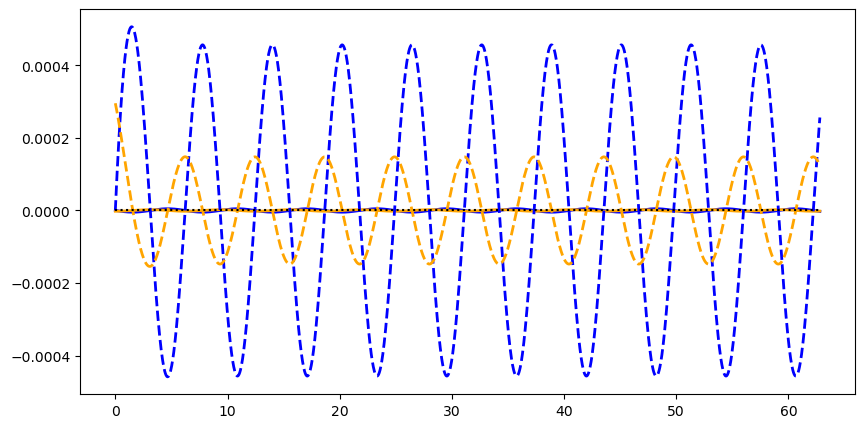

In [5]:
# Residuals
plt.rcParams["figure.figsize"] = (10,5)
fig,ax = plt.subplots(1,1)

ax.plot(t,(u_g_2f-u_g_ta)/np.max(u_g_2f),linewidth=2.0,linestyle="solid",color="blue")
ax.plot(t,(v_g_2f-v_g_ta)/np.max(v_g_2f),linewidth=2.0,linestyle="solid",color="orange")

ax.plot(t,(u_d_2f-u_d_ta)/np.max(u_d_2f),linewidth=2.0,linestyle="--",color="blue")
ax.plot(t,(v_d_2f-v_d_ta)/np.max(v_d_2f),linewidth=2.0,linestyle="--",color="orange")

ax.hlines(y=0,xmin=0,xmax=np.max(t), linestyle="dotted", color="black")

/Users/haly/anaconda3/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


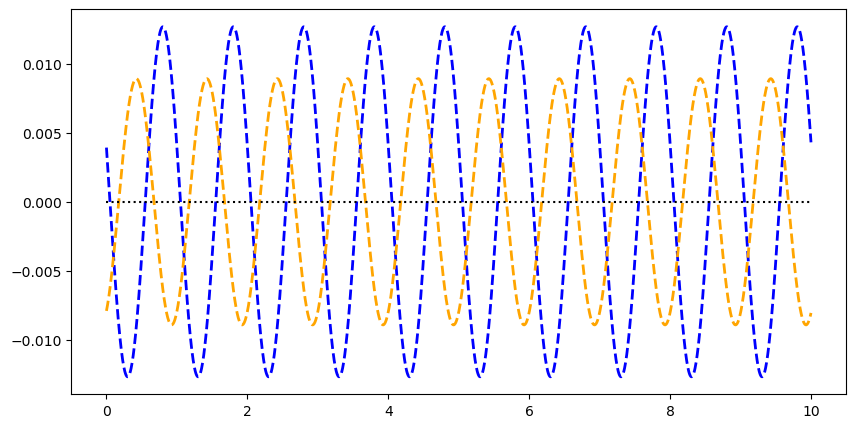

In [8]:
# Drift
plt.rcParams["figure.figsize"] = (10,5)
fig,ax = plt.subplots(1,1)

ax.plot(t/2./pi,(u_d_ta-u_g_ta)/np.max(u_g_ta),linewidth=2.0,linestyle="dashed",color="blue")
ax.plot(t/2./pi,(v_d_ta-v_g_ta)/np.max(v_g_ta),linewidth=2.0,linestyle="dashed",color="orange")



ax.hlines(y=0,xmin=0,xmax=np.max(t/2/pi), linestyle="dotted", color="black")

In [49]:

kghost = 3
nxk = 128
side = 0
k = np.linspace(0,2*kghost+nxk-1,2*kghost+nxk)
for i in range(0,2*kghost+nxk):
    kref = kghost + (k[i]+(kghost)*(nxk-1))%nxk
    if kref !=k[i]:
        kref = kref + (side*(kghost+nxk)+1-k[i])*(kghost-1)
    print(k[i],kref)
print("###########")
side = 1
#for i in range(0,2*kghost+nxk):
#    kref = kghost + side*((nxk-1))
#    print(k[i],kref)


0.0 130.0
1.0 129.0
2.0 128.0
3.0 3.0
4.0 4.0
5.0 5.0
6.0 6.0
7.0 7.0
8.0 8.0
9.0 9.0
10.0 10.0
11.0 11.0
12.0 12.0
13.0 13.0
14.0 14.0
15.0 15.0
16.0 16.0
17.0 17.0
18.0 18.0
19.0 19.0
20.0 20.0
21.0 21.0
22.0 22.0
23.0 23.0
24.0 24.0
25.0 25.0
26.0 26.0
27.0 27.0
28.0 28.0
29.0 29.0
30.0 30.0
31.0 31.0
32.0 32.0
33.0 33.0
34.0 34.0
35.0 35.0
36.0 36.0
37.0 37.0
38.0 38.0
39.0 39.0
40.0 40.0
41.0 41.0
42.0 42.0
43.0 43.0
44.0 44.0
45.0 45.0
46.0 46.0
47.0 47.0
48.0 48.0
49.0 49.0
50.0 50.0
51.0 51.0
52.0 52.0
53.0 53.0
54.0 54.0
55.0 55.0
56.0 56.0
57.0 57.0
58.0 58.0
59.0 59.0
60.0 60.0
61.0 61.0
62.0 62.0
63.0 63.0
64.0 64.0
65.0 65.0
66.0 66.0
67.0 67.0
68.0 68.0
69.0 69.0
70.0 70.0
71.0 71.0
72.0 72.0
73.0 73.0
74.0 74.0
75.0 75.0
76.0 76.0
77.0 77.0
78.0 78.0
79.0 79.0
80.0 80.0
81.0 81.0
82.0 82.0
83.0 83.0
84.0 84.0
85.0 85.0
86.0 86.0
87.0 87.0
88.0 88.0
89.0 89.0
90.0 90.0
91.0 91.0
92.0 92.0
93.0 93.0
94.0 94.0
95.0 95.0
96.0 96.0
97.0 97.0
98.0 98.0
99.0 99.0
100.0 100.0
10

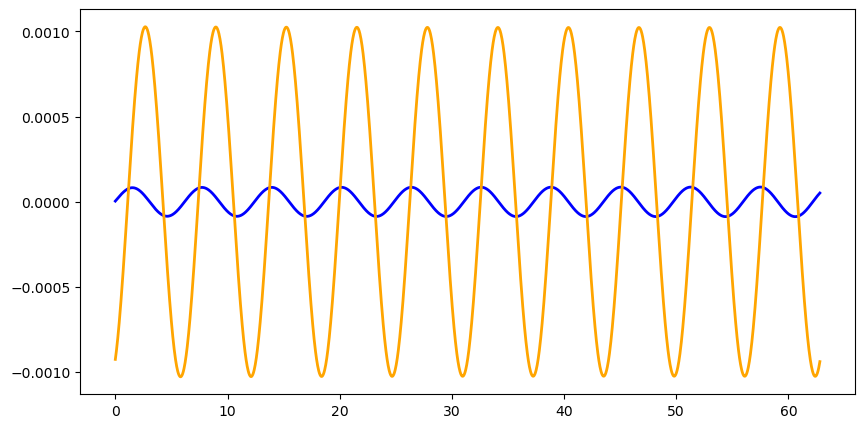

In [ ]:
plt.rcParams["figure.figsize"] = (10,5)
fig,ax = plt.subplots(1,1)
ax.plot(t,(u_g_ta-4.14293833*cos(t))/np.max(u_g_ta),linewidth=2.0,linestyle="solid",color="blue")
ax.plot(t,(v_g_ta-(-2.1172*sin(t)))/np.max(v_g_ta),linewidth=2.0,linestyle="solid",color="orange")

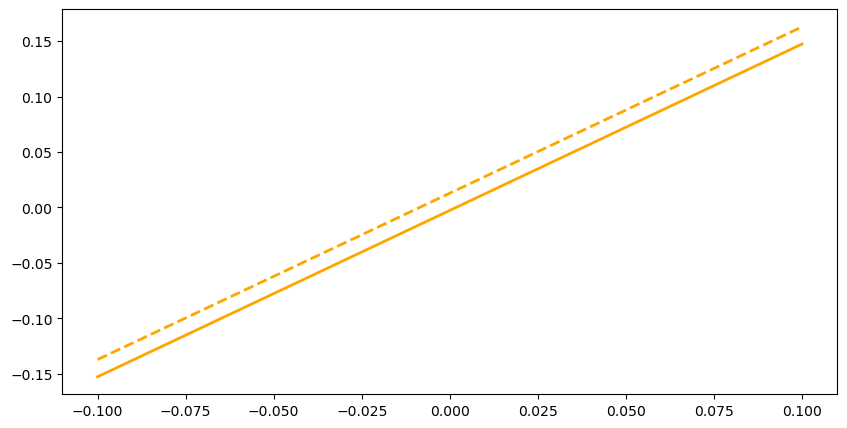

In [99]:
plt.rcParams["figure.figsize"] = (10,5)
fig,ax = plt.subplots(1,1)

x = np.linspace(-0.1,0.1,5)
S = -1.5 * omega

vv_g = np.zeros((len(t),len(x)))
vv_d = np.zeros((len(t),len(x)))

for i in range(0,len(t)):
    vv_g[i] = np.real(v_g_ta[i])-S*x
    vv_d[i] = np.real(v_d_ta[i])-S*x


ax.plot(x,vv_g[100],linewidth=2.0,linestyle="solid",color="orange")

ax.plot(x,vv_d[100],linewidth=2.0,linestyle="--",color="orange")

#ax.hlines(y=0,xmin=np.min(x),xmax=np.max(x), linestyle="dotted", color="black")